In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import seaborn
from os.path import join
%matplotlib inline

In [14]:
from pbcore.io import *
from PRmm.extras import activityPlots
from PRmm.fixture import Fixture

bamFname = "/pbi/collections/315/3150113/r54007_20160226_225820/1_A01/Sequel_3.0.17/m54007_160226_225834.subreads.bam"
plsFname = "/pbi/collections/315/3150113/r54007_20160226_225820/1_A01/Sequel_3.0.17_plxbax/m54007_160226_225834.pls.h5"
basFname = "/pbi/collections/315/3150113/r54007_20160226_225820/1_A01/Sequel_3.0.17_plxbax/m54007_160226_225834.bas.h5"
trcFname = "/pbi/collections/315/3150113/r54007_20160226_225820/1_A01/m54007_160226_225834.trc.h5"
b = IndexedBamReader(bamFname)

someHoles = [7340750, 7405711, 7471823, 7602881, 8323772,
             8847498, 9175154, 9240716, 10420625, 10682502,
             27919292, 28050378]

fx = Fixture(trcFname=trcFname, plsFname=plsFname, basFname=basFname)

In [4]:
b.peer.header

{'HD': {'SO': 'unknown', 'VN': '3.0.0', 'pb': '3.0.1'},
 'PG': [{'ID': 'baz2bam', 'PN': 'baz2bam', 'VN': '2.4.2.173443'},
  {'ID': 'bazFormat', 'PN': 'bazformat', 'VN': '1.3.0'},
  {'ID': 'bazwriter', 'PN': 'bazwriter', 'VN': '2.4.2.173791'}],
 'RG': [{'DS': 'READTYPE=SUBREAD;DeletionQV=dq;DeletionTag=dt;InsertionQV=iq;MergeQV=mq;SubstitutionQV=sq;SubstitutionTag=st;Ipd:Frames=ip;PulseWidth:Frames=pw;PkMid=pm;PkMean=pa;LabelQV=pq;AltLabel=pt;AltLabelQV=pv;PulseMergeQV=pg;PulseCall=pc;PrePulseFrames=pd;PulseCallWidth=px;StartFrame=sf;BINDINGKIT=100-619-300;SEQUENCINGKIT=100-620-000;BASECALLERVERSION=3.0.17.173791;FRAMERATEHZ=80.000000',
   'ID': 'd464cf8e',
   'PL': 'PACBIO',
   'PU': 'm54007_160226_225834'}],
 'SQ': []}

In [9]:
for hn in someHoles:
    print b.readsByHoleNumber(hn)[0].hqRegionSnr

array('f', [5.742544174194336, 10.604595184326172, 8.384943008422852, 13.079849243164062])
array('f', [6.110711097717285, 11.634449005126953, 8.780427932739258, 13.844367980957031])
array('f', [6.075575828552246, 11.357319831848145, 7.465121746063232, 11.547253608703613])
array('f', [5.130764961242676, 14.165628433227539, 5.018050670623779, 12.871647834777832])
array('f', [5.512434482574463, 12.16537857055664, 7.216556072235107, 12.435808181762695])
array('f', [5.571443557739258, 10.09812068939209, 7.754070281982422, 11.935806274414062])
array('f', [5.152688026428223, 9.34846019744873, 6.63636589050293, 11.109942436218262])
array('f', [5.234023571014404, 11.692028999328613, 5.7565155029296875, 14.193131446838379])
array('f', [6.91710090637207, 12.766258239746094, 8.359861373901367, 12.818039894104004])
array('f', [6.18495512008667, 11.257732391357422, 9.514086723327637, 12.922754287719727])
array('f', [5.565001010894775, 10.317449569702148, 5.245249271392822, 11.902843475341797])
array

/Users/dalexander/.virtualenvs/VE-Qt/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


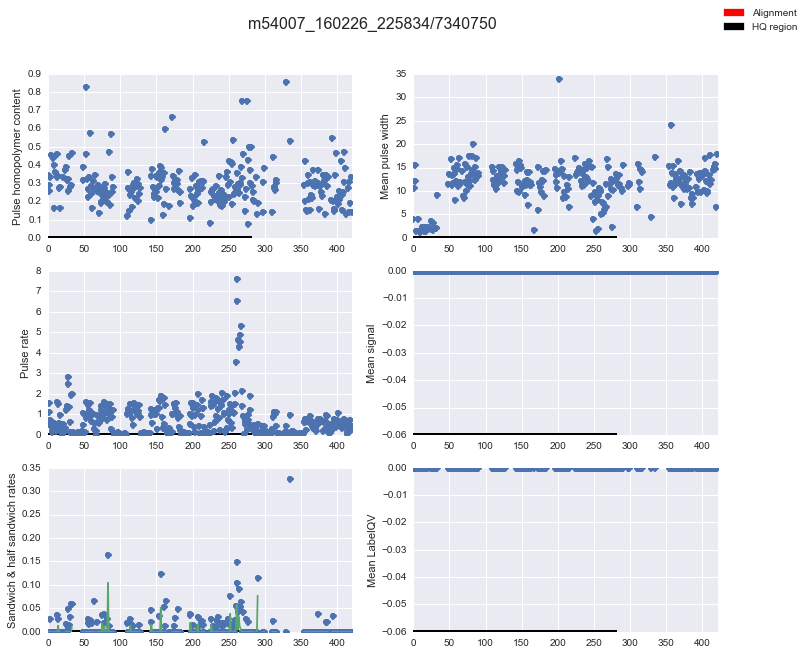

In [15]:
activityPlots.plotMetrics(fx[someHoles[0]])

[ 13.07984924   8.38494301  10.60459518   5.74254417]


<function __main__.plotMetricsP>

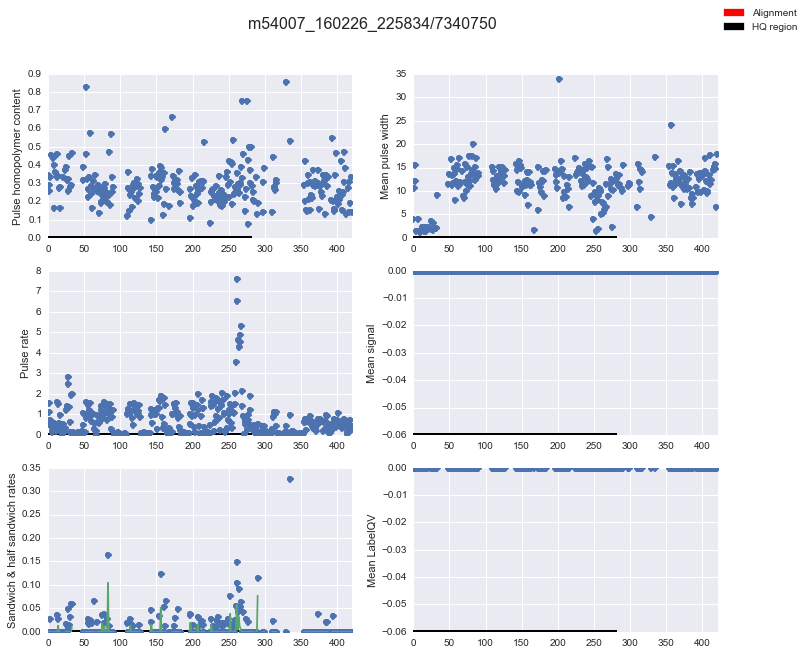

In [16]:
from ipywidgets import *

def plotMetricsP(hnString):
    hn = int(hnString)
    z = fx[hn]
    activityPlots.plotMetrics(z)
    print z.hqRegionSnr
    
hnW = Select(options=map(str, someHoles))

interact(plotMetricsP, hnString=hnW)    
